Text(0.5, 1.0, 'Phase')

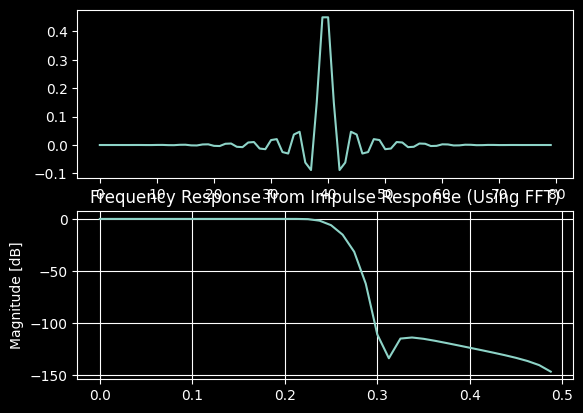

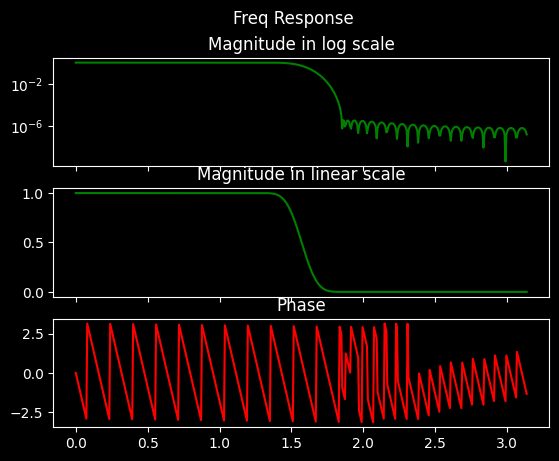

In [ ]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq

#Median Filter

taps = 1000
cutoff_freq = 10
sample_rate = 2000
lowpass_coef = signal.firwin(taps, cutoff_freq, nyq=sample_rate/2)

# kernel is filter kernael
kernel = signal.firwin(80, 0.5, window=('kaiser', 11))

# freqz function is used to compute the frequency response of a digital filter
# h - The frequencies at which the frequency response is computed, in the same units as fs.
# w - The frequency response of the filter. It is a complex array,
#     where the magnitude (abs(h)) represents the amplitude response and the phase (angle(h)) represents the phase response.
# freqZ vs freqs Key Differences:
# Domain:
# freqz is for discrete-time (digital) filters in the z-domain.
# freqs is for continuous-time (analog) filters in the s-domain.
# Input:
# freqz works with digital filter coefficients (typically from filters designed with methods like FIR or IIR).
# freqs works with analog filter coefficients (often from filter designs like Butterworth, Chebyshev, etc., in continuous time).
# Frequency Range:
# freqz computes the response for normalized frequencies (usually between 0 and π for digital systems).
# freqs computes the response for real frequencies (in Hz or radians per second) for analog systems.
# Use Case:
# Use freqz when dealing with digital systems (e.g., after designing a digital FIR or IIR filter).
# Use freqs when analyzing analog filters or when working with continuous-time systems like RC circuits.

# Define filter coefficients (example FIR filter)
#b = [0.1, 0.15, 0.5, 0.15, 0.1]  # FIR filter numerator coefficients (feedforward coef)
#a = [1.0]  # Denominator for FIR filters is [1] (no feedback coed)
# Compute the frequency response
#w, h = freqz(b, a)

# we calculte freq response from impulse response
w, h = signal.freqz(kernel, [1.0])

plt.subplot(2, 1, 1)
plt.plot(kernel)

# Compute the FFT of the impulse response
# We can
fft_result = fft(kernel)
n = len(kernel)
frequencies = fftfreq(n, d=1.0)  # Assuming normalized sampling rate
plt.subplot(2, 1, 2)
plt.plot(frequencies[:n//2], 20 * np.log10(abs(fft_result[:n//2])))
plt.title('Frequency Response from Impulse Response (Using FFT)')
plt.ylabel('Magnitude [dB]')
plt.grid()

f, plt_arr =plt.subplots(3,sharex=True)
f.suptitle('Freq Response')

plt_arr[0].semilogy(w, np.abs(h), 'g')
plt_arr[0].set_title("Magnitude in log scale")
plt_arr[1].plot(w, np.abs(h), 'g')
plt_arr[1].set_title("Magnitude in linear scale")
plt_arr[2].plot(w, np.angle(h), 'r')
plt_arr[2].set_title("Phase")
